# **Multi-Class classification on CIFAR-10 dataset using VGG-16 inspired CNN model**

Contributed by Sayak Bhattacharya

Github [GDSC TMSL ML WORKSHOP 2023](https://github.com/GDSC-TMSL/ML-Study-Jams-2023/tree/main/ML_Study_Jam/Computer_Vision)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

## **Classifying CIFAR-10 classes by building a DL model with Keras functional API**

In [ ]:
#Loading in the data from Keras's datasets

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("Training Dataset size: ",x_train.shape)
print("Output size: ",y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
Training Dataset size:  (50000, 32, 32, 3)
Output size:  (50000,)


In [ ]:
# Calculating no. of classes

K = len(set(y_train))
print('No of classes in output set is: ',K)

No of classes in output set is:  10


In [ ]:
# Building the model using Keras functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, kernel_size=(3,3), strides=2, activation='relu')(i)
x = Conv2D(64, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Conv2D(128, kernel_size=(3,3), strides=2, activation='relu')(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)


In [ ]:
# Compiling and fitting the Model

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)
model.summary()

Epoch 1/15
1563/1563 [==============================] - 56s 35ms/step - loss: 1.5586 - accuracy: 0.4336 - val_loss: 1.2925 - val_accuracy: 0.5301
Epoch 2/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2740 - accuracy: 0.5421 - val_loss: 1.1235 - val_accuracy: 0.6022
Epoch 3/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1348 - accuracy: 0.5927 - val_loss: 1.0066 - val_accuracy: 0.6434
Epoch 4/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0426 - accuracy: 0.6294 - val_loss: 1.0006 - val_accuracy: 0.6444
Epoch 5/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9738 - accuracy: 0.6543 - val_loss: 0.9060 - val_accuracy: 0.6827
Epoch 6/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9143 - accuracy: 0.6762 - val_loss: 0.9619 - val_accuracy: 0.6621
Epoch 7/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8660 - accuracy: 0.6902 - val_loss: 0.8457 -

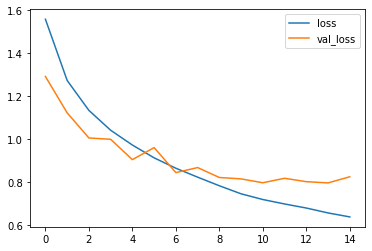

In [ ]:
# Plotting loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

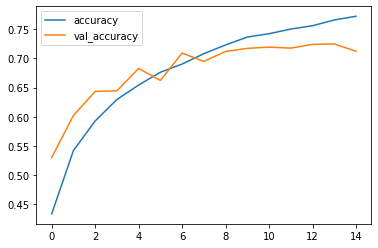

In [ ]:
# Plotting accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
# Evaluating our model

print(model.evaluate(x_test, y_test))

313/313 [==============================] - 3s 10ms/step - loss: 0.8263 - accuracy: 0.7122
[0.826286256313324, 0.7121999859809875]


## **Plotting a Confusion Matrix for the classification**

Confusion Matrix, without normalization
[[747  30  29  20  10   5   5   8 116  30]
 [ 12 871   1   6   1   3   6   1  29  70]
 [ 83   7 593  69  59  89  47  24  24   5]
 [ 29   9  70 536  38 200  62  21  20  15]
 [ 35   3  95  91 604  55  56  41  17   3]
 [ 16   4  61 207  34 618  20  24  10   6]
 [  6  13  40  91  18  29 780   5  14   4]
 [ 23   5  32  56  54  89   8 707   7  19]
 [ 37  36   6  14   8   5   4   4 872  14]
 [ 26  80   8  16   2  12   8  16  38 794]]


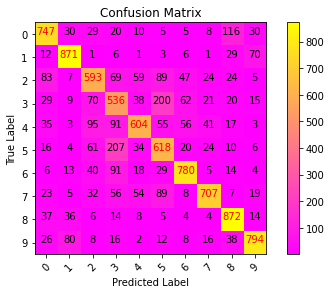

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize='False', title='Confusion Matrix', cmap='spring'):

  # This function returns a confusion matrix. Normalization can be applied by setting normalize=True

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] #astype() is used to convert a pandas object to a particular datatype
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix, without normalization')
  
  print(cm)

  #used when display resolution and image resolution are not same(Displays the exact image)
  plt.imshow(cm, interpolation='nearest', cmap=cmap) 

  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes)) # No. of tick marks generated as per the no of classes
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.0
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format( cm[i, j], fmt), horizontalalignment = 'center', color = 'red' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)), False) # Sending the confusion matrix and 10 class indexes to the plot function

Text(0.5, 1.0, 'True Label:deer   Predicted Label:bird')

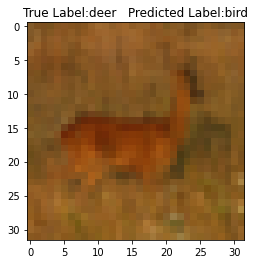

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f'True Label:{labels[y_test[i]]}   Predicted Label:{labels[p_test[i]]}')

## **Developing New Model inspired from VGG and implementing batch normalisation**

In [ ]:
# Building the model using Keras functional API

i = Input(shape=x_train[0].shape)

x = Conv2D(32, kernel_size=(3,3), padding='same', activation='relu')(i)
x = BatchNormalization()(x) 
x = Conv2D(32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x) 
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(i)
x = BatchNormalization()(x) 
x = Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x) 
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(i)
x = BatchNormalization()(x) 
x = Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x) 
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model2 = Model(i,x)

In [ ]:
# Compiling the model
model2.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 39s 18ms/step - loss: 1.8983 - accuracy: 0.4290 - val_loss: 1.2584 - val_accuracy: 0.5475
Epoch 2/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2332 - accuracy: 0.5675 - val_loss: 1.2270 - val_accuracy: 0.5671
Epoch 3/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0704 - accuracy: 0.6277 - val_loss: 1.2691 - val_accuracy: 0.5686
Epoch 4/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9442 - accuracy: 0.6761 - val_loss: 1.1015 - val_accuracy: 0.6351
Epoch 5/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8320 - accuracy: 0.7123 - val_loss: 1.0846 - val_accuracy: 0.6476
Epoch 6/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7456 - accuracy: 0.7393 - val_loss: 1.0799 - val_accuracy: 0.6592
Epoch 7/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6755 - accuracy: 0.7672 - val_loss: 1.2377 -

In [ ]:
# Evaluating our model

print(model2.evaluate(x_test, y_test))

313/313 [==============================] - 2s 5ms/step - loss: 1.5415 - accuracy: 0.7295
[1.5414892435073853, 0.7294999957084656]


In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0     

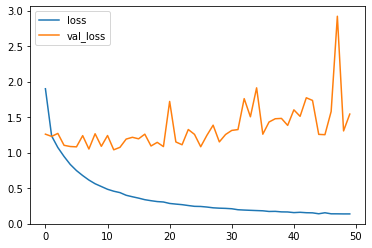

In [ ]:
# Plotting loss per iteration
plt.plot(r2.history['loss'],label='loss')
plt.plot(r2.history['val_loss'],label='val_loss')
plt.legend()

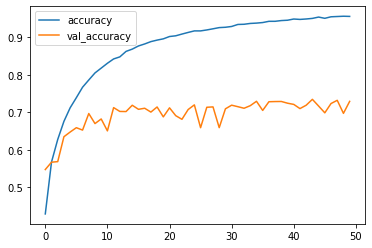

In [ ]:
# Plotting accuracy per iteration
plt.plot(r2.history['accuracy'],label='accuracy')
plt.plot(r2.history['val_accuracy'],label='val_accuracy')
plt.legend()

# **Fitting with data augmentation**

In [ ]:
# We can do fresh fit_generator to start new model learning from scratch
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train[0].shape[0] // batch_size
r3 = model2.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50 )

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1/1 [==============================] - 3s 3s/step - loss: 1.5323 - accuracy: 0.7500 - val_loss: 1.4765 - val_accuracy: 0.7259
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 1.8110 - accuracy: 0.7188 - val_loss: 1.4206 - val_accuracy: 0.7219
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 3.1785 - accuracy: 0.5625 - val_loss: 1.3077 - val_accuracy: 0.7094
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 1.9206 - accuracy: 0.5938 - val_loss: 1.2221 - val_accuracy: 0.6905
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 1.0402 - accuracy: 0.7500 - val_loss: 1.1747 - val_accuracy: 0.6601
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 1.1408 - accuracy: 0.6875 - val_loss: 1.1861 - val_accuracy: 0.6187
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 2.1609 - accuracy: 0.4688 - val_loss: 1.2382 - val_accuracy: 0.5721
Epoch 8/50
1/1 [==============================] - 1s

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0     

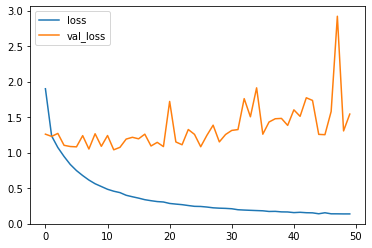

In [ ]:
# Plotting loss per iteration
plt.plot(r2.history['loss'],label='loss')
plt.plot(r2.history['val_loss'],label='val_loss')
plt.legend()

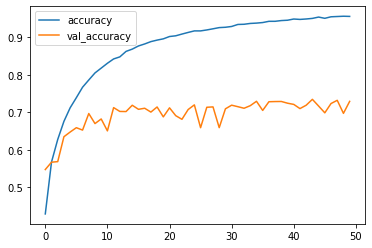

In [ ]:
# Plotting accuracy per iteration
plt.plot(r2.history['accuracy'],label='accuracy')
plt.plot(r2.history['val_accuracy'],label='val_accuracy')
plt.legend()